In [1]:
import xml.etree.ElementTree as et 

In [2]:
import numpy as np
import pandas as pd
from pandas.api.types import is_numeric_dtype

In [3]:
from tqdm.auto import tqdm

In [63]:
from pandas.api.types import is_numeric_dtype
def mean_str(col):
    if is_numeric_dtype(col):
        return col.mean()
    else:
        return col.unique()[0] if col.unique().shape[0] == 1 else np.NaN

In [4]:
xmlpath = "/mnt/fimm/EA5 Caroline/Julius_interactive plot/Julius_interactive plot_Flattened/230118_174754-V__2023-01-18T17_47_36-Measurement 1_1.xml"

In [19]:
xmlpath = "/mnt/fimm/EA5 Caroline/Julius_interactive plot/230118_174754-V__2023-01-18T17_47_36-Measurement 1_1.xml"

In [20]:
xtree = et.parse(xmlpath)
xroot = xtree.getroot()

In [21]:
node_plates = xroot[0]
node_channels = xroot[1]
node_images = xroot[2]

In [22]:
plate = node_plates[0].find('name').text
rows = node_plates[0].find('rows').text
columns = node_plates[0].find('columns').text

In [23]:
text_contents = ['channel', 'plate', 'row', 'column', 'time', 'plane']
attrib_contents = ['resolution', 'center']

In [24]:
df = pd.DataFrame(columns=['image_name'] + text_contents + ['resolution_x','resolution_y','resolution_z','center_x','center_y','center_z'])
df

,image_name,channel,plate,row,column,time,plane,resolution_x,resolution_y,resolution_z,center_x,center_y,center_z


In [25]:
for i, image in enumerate(tqdm(node_images)):
    one_dict = {}
    one_dict['image_name'] = image.attrib['url'][:-4]
#     for content in text_contents:
#         one_dict[content] = image.find(content).text
    for content in attrib_contents:
        for c in ['x','y','z']:
            one_dict[f'{content}_{c}'] = float(image.find(content).attrib[c])
    one_df = pd.DataFrame([one_dict])
    df = pd.concat([df, one_df], axis=0)
#     df = df.append(one_dict, ignore_index=True)

  0%|          | 0/88000 [00:00<?, ?it/s]

In [34]:
df['fov'] = [int(pl.split('_')[3][1:]) for pl in df.image_name]

In [40]:
df['well'] = [str(pl.split('_')[1][1:]) for pl in df.image_name]

In [29]:
df

,image_name,channel,plate,row,column,time,plane,resolution_x,resolution_y,resolution_z,center_x,center_y,center_z
0,p1_wB2_t1_m1_c1_z1_l1_o0,1,1,2,2,1,1,0.149494,0.149494,1.0,3241.179855,2934.417855,-2.0
0,p1_wB2_t1_m1_c1_z2_l1_o0,1,1,2,2,1,2,0.149494,0.149494,1.0,3241.179855,2934.417855,-0.5
0,p1_wB2_t1_m1_c1_z3_l1_o0,1,1,2,2,1,3,0.149494,0.149494,1.0,3241.179855,2934.417855,1.0
0,p1_wB2_t1_m1_c1_z4_l1_o0,1,1,2,2,1,4,0.149494,0.149494,1.0,3241.179855,2934.417855,2.5
0,p1_wB2_t1_m1_c1_z5_l1_o0,1,1,2,2,1,5,0.149494,0.149494,1.0,3241.179855,2934.417855,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,p1_wJ22_t1_m64_c5_z1_l1_o0,5,1,22,10,1,1,0.149494,0.149494,1.0,63770.109948,28863.855692,-2.0
0,p1_wJ22_t1_m64_c5_z2_l1_o0,5,1,22,10,1,2,0.149494,0.149494,1.0,63770.109948,28863.855692,-0.5
0,p1_wJ22_t1_m64_c5_z3_l1_o0,5,1,22,10,1,3,0.149494,0.149494,1.0,63770.109948,28863.855692,1.0
0,p1_wJ22_t1_m64_c5_z4_l1_o0,5,1,22,10,1,4,0.149494,0.149494,1.0,63770.109948,28863.855692,2.5


In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

<AxesSubplot:xlabel='center_x', ylabel='center_y'>

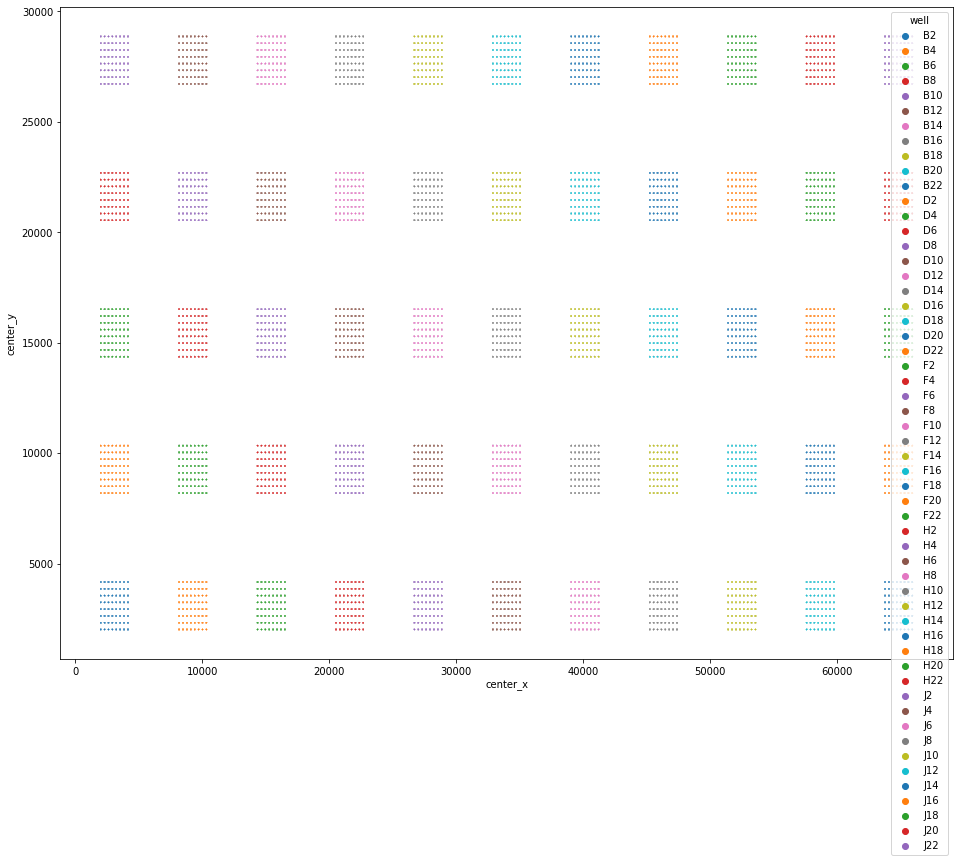

In [57]:
fig, ax = plt.subplots(figsize=(16,12))
sns.scatterplot(data=df, x='center_x', y='center_y', s=2, hue='well', palette='tab10')

In [41]:
df

,image_name,channel,plate,row,column,time,plane,resolution_x,resolution_y,resolution_z,center_x,center_y,center_z,fov,well
0,p1_wB2_t1_m1_c1_z1_l1_o0,1,1,2,2,1,1,0.149494,0.149494,1.0,3241.179855,2934.417855,-2.0,1,B2
0,p1_wB2_t1_m1_c1_z2_l1_o0,1,1,2,2,1,2,0.149494,0.149494,1.0,3241.179855,2934.417855,-0.5,1,B2
0,p1_wB2_t1_m1_c1_z3_l1_o0,1,1,2,2,1,3,0.149494,0.149494,1.0,3241.179855,2934.417855,1.0,1,B2
0,p1_wB2_t1_m1_c1_z4_l1_o0,1,1,2,2,1,4,0.149494,0.149494,1.0,3241.179855,2934.417855,2.5,1,B2
0,p1_wB2_t1_m1_c1_z5_l1_o0,1,1,2,2,1,5,0.149494,0.149494,1.0,3241.179855,2934.417855,4.0,1,B2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,p1_wJ22_t1_m64_c5_z1_l1_o0,5,1,22,10,1,1,0.149494,0.149494,1.0,63770.109948,28863.855692,-2.0,64,J22
0,p1_wJ22_t1_m64_c5_z2_l1_o0,5,1,22,10,1,2,0.149494,0.149494,1.0,63770.109948,28863.855692,-0.5,64,J22
0,p1_wJ22_t1_m64_c5_z3_l1_o0,5,1,22,10,1,3,0.149494,0.149494,1.0,63770.109948,28863.855692,1.0,64,J22
0,p1_wJ22_t1_m64_c5_z4_l1_o0,5,1,22,10,1,4,0.149494,0.149494,1.0,63770.109948,28863.855692,2.5,64,J22


In [42]:
df.well.unique()

array(['B2', 'B4', 'B6', 'B8', 'B10', 'B12', 'B14', 'B16', 'B18', 'B20',
       'B22', 'D2', 'D4', 'D6', 'D8', 'D10', 'D12', 'D14', 'D16', 'D18',
       'D20', 'D22', 'F2', 'F4', 'F6', 'F8', 'F10', 'F12', 'F14', 'F16',
       'F18', 'F20', 'F22', 'H2', 'H4', 'H6', 'H8', 'H10', 'H12', 'H14',
       'H16', 'H18', 'H20', 'H22', 'J2', 'J4', 'J6', 'J8', 'J10', 'J12',
       'J14', 'J16', 'J18', 'J20', 'J22'], dtype=object)

In [43]:
df.to_csv('ea5/centers_unflattened.csv', index=False)

In [67]:
fovdf = df.groupby(by=['well','fov']).agg(mean_str).reset_index().dropna(axis=1)

In [74]:
fovdf.drop(columns=['row', 'column', 'time', 'plate','resolution_z'], inplace=True)
fovdf

,well,fov,resolution_x,resolution_y,center_x,center_y
0,B10,1,0.149494,0.149494,27943.570692,2934.417855
1,B10,2,0.149494,0.149494,26716.523692,2014.132855
2,B10,3,0.149494,0.149494,27023.285692,2014.132855
3,B10,4,0.149494,0.149494,27330.046692,2014.132855
4,B10,5,0.149494,0.149494,27636.808692,2014.132855
...,...,...,...,...,...,...
3515,J8,60,0.149494,0.149494,21767.972983,28863.855692
3516,J8,61,0.149494,0.149494,21461.210983,28863.855692
3517,J8,62,0.149494,0.149494,21154.448983,28863.855692
3518,J8,63,0.149494,0.149494,20847.687983,28863.855692


<AxesSubplot:xlabel='center_x', ylabel='center_y'>

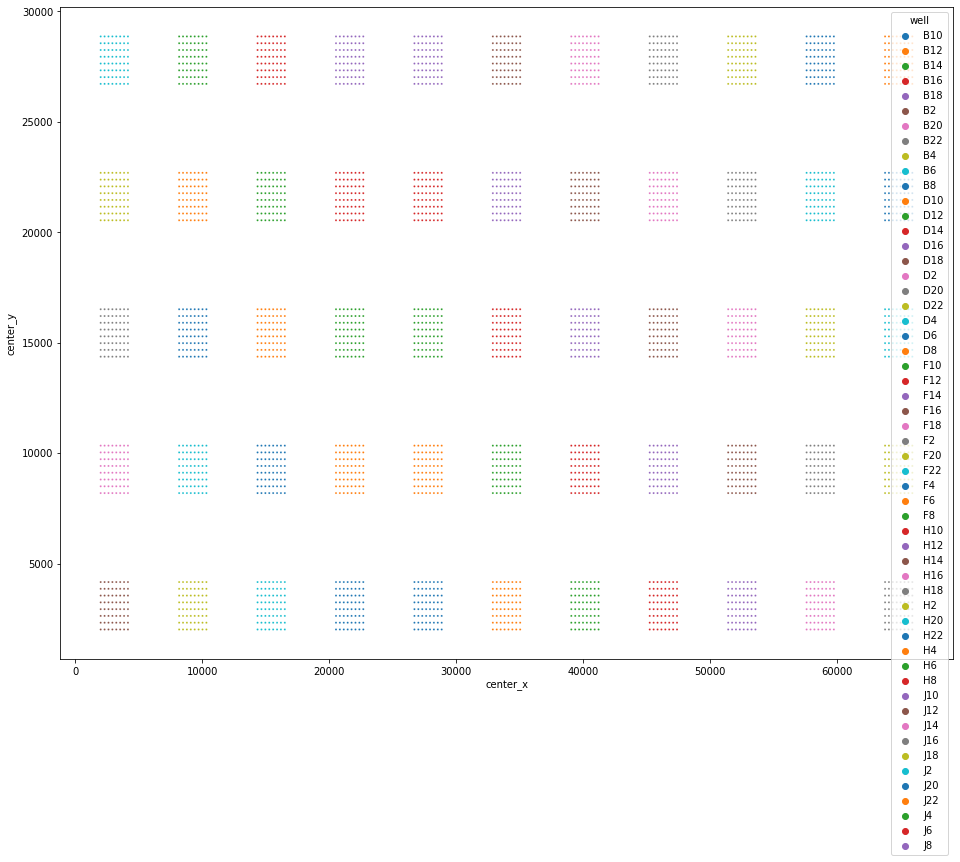

In [75]:
fig, ax = plt.subplots(figsize=(16,12))
sns.scatterplot(data=fovdf, x='center_x', y='center_y', s=4, hue='well', palette='tab10')

In [78]:
fovdf.to_csv('ea5/centers_fov64.csv', index=False)